# Fish dataset for Clustering analysis

Original dataset from the [Journal of Statistics Education](http://ww2.amstat.org/publications/jse/jse_data_archive.htm)
and reconfigured by DataCamp named [Fish Measurements](https://assets.datacamp.com/production/repositories/655/datasets/fee715f8cf2e7aad9308462fea5a26b791eb96c4/fish.csv)

In [6]:
# Get dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
# From the jse website documentation the column names were derived
cols = ['species','weight_grams','length1','length2','length3','height','width']

In [9]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/fee715f8cf2e7aad9308462fea5a26b791eb96c4/fish.csv', names=cols, header=None)

In [10]:
df.head()

,species,weight_grams,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [11]:
samples = df.drop('species', axis=1).values

In [13]:
species = df['species'].values

In [17]:
df.species.value_counts()

Bream    34
Roach    20
Pike     17
Smelt    14
Name: species, dtype: int64

## Cluster fish data after scaling using a pipeline

In [15]:
# import dependencies
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
# Instantiate scaler
scaler = StandardScaler()

In [18]:
# Instantiate KMeans with 4 clusters given the results of value_counts above is 4 species
kmeans = KMeans(n_clusters=4)

In [20]:
# Create pipeline using 'make_pipeline'
pipeline = make_pipeline(scaler, kmeans)

In [21]:
# Fit the pipeline to samples
pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

In [22]:
# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

In [23]:
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels,'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

In [24]:
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,1,0,19,1
1,33,0,1,0
2,0,17,0,0
3,0,0,0,13


Although it isn't perfect this data creates 4 clusters

##  Review variance of fish data using PCA features

In [25]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [26]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

In [27]:
# Fit the pipeline to 'samples'
pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

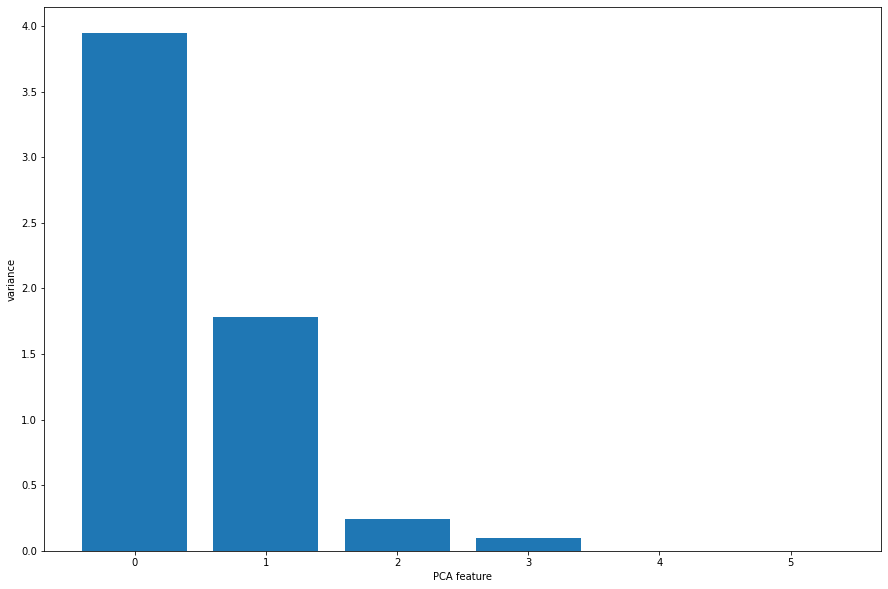

In [32]:
# Plot the explained variances
features = range(pca.n_components_)
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Looks like PCA features 0 and 1 have significant variance. PCA features 2 and 3 do not.

## Dimension reduction of fish measurements

Using an intrinsic dimension of 2 from the above results

In [33]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

In [35]:
# Create scaled_samples 
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_samples = scaler.transform(samples)

In [36]:
# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

In [37]:
# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


The dimensionality has been reduced from 6 to 2 now